# Overview
This week we will be studying magnetism (ferromagnetism) and attempting to model the alignment of magnetic spins as a function of i) temperature and ii) applied magnetic field. From a more global perspective, magnetism in solids arises due to the magnetic spin of the electrons.(inherently a quantum effect)  In some cases, the interaction between neighboring spins is so strong that the overall energy of the system is lowered when the spins align.  As the temperature increases, thermal energy tends to destroy this perfect alignment.  Applying an external magnetic field will also affect this alignment and will give rise to something called hysteresis.  

The model we will  be using to model magnetism is called the Ising model, which is one of the more well-known and most-used models in computational physics. It involves representing a solid as a collection of spins (-1 or +1) and flipping spins based on calculated energy differences. We are at a point in the class where you will not need any new programming concepts; the ones we have already should be sufficient to implement this model.  In this workbook, I will step you through some of the key tasks you will need to build an Ising model.  These topics include:

1. Site energy calculations.
2. Energy difference for spin flip.
3. Sampling a probability density function (PDF).


## Site energy calculation
In the Ising model, the spin state of each atom on a lattice is represented by a +1 or a -1.  A +1 indicates spin up and a and a -1 indicates spin down.  In python, we will represent this lattice of spins in a 2D numpy array.  The energy of a given site ($E_i$) is given by the equation:

$$ E_i = - J\sum_j s_i s_j$$

We'll choose $J = 1$ initially but you could modify this number to change the strength (and nature) of the interaction between spins. (Question worth pondering:  If $J = -1$, would neigbhbors with like spins be favored or unlike spins?)

1. <span style="color:red">In the cell below, you will find a small spin matrix.  Add a function that takes the spin matrix and a specified site (i,j) in that matrix and returns the energy of that site.  We'll use periodic boundary conditions here, which means that when considering sites on the edges, neighboring sites are those at the opposite edge of the matrix.  </span>
2. <span style="color:red">Now test this function out on a few sites for the spin matrix provided. Below you'll find the correct energies for a few sites to check yourself on. </span>
3. <span style="color:red">Use a loop to calculate the *total energy* of the entire solid by adding up all of the site energies. </span>





| Site  | Energy |
|-------|--------|
| (1,1) | -2     |
| (2,2) | 2      |
| (2,1) | -2     |
| (1,3) | -2     |


In [3]:
from numpy import array

J = 1.0

spins = array([[1,-1,1,1],[-1,-1,1,1],[1,-1,-1,1],[-1,-1,1,1]])
print(spins)

# Variable to store the total energy of the lattice
E = 0

# Making a function to calculate site energy given i and j indeces with i representing the x value and j the y value (indeces)
def siteEnergy(spinMat, i, j):
    up = i - 1
    down = i + 1 if i < spinMat.shape[0] - 1 else 0
    left = j - 1
    right = j + 1 if j < spinMat.shape[1] - 1 else 0
    
    return - J * spinMat[i, j] * (spinMat[up, j] + spinMat[down, j] + spinMat[i, left] + spinMat[i, right])


# Problem 2: Test the function on a few sites
# Should be -2
print(siteEnergy(spins, 1, 1))

# Should be 2
print(siteEnergy(spins, 2, 2))

# Should be -2
print(siteEnergy(spins, 2, 1))

# Should be -2
print(siteEnergy(spins, 1, 3))

# Problem 3
for i in range(spins.shape[0]):
    for j in range(spins.shape[1]):
        E += siteEnergy(spins, i, j)

print(f'Total energy of the lattice : {E}')

[[ 1 -1  1  1]
 [-1 -1  1  1]
 [ 1 -1 -1  1]
 [-1 -1  1  1]]
-2.0
2.0
-2.0
-2.0
Total energy of the lattice : -8.0


## Energy difference of site flip

In your model of magnetism this week it will be important that you can calculate the energy difference associated with flipping a spin (either from -1 to +1 or viceversa).  

1. <span style="color:red">Build another function that uses the function you created above and calculates the energy difference of changing a spin site.  The function should take as arguments the i) spin matrix and ii) site you want to consider.  The function should return a single number.  **The function should leave the spin matrix unmodified**.  </span>
2. <span style="color:red"> Call your function for several site choices and compare your results with your neighbor until you feel confident that it is correct.  The correct energy differences for some sites are given below so you can check yourself.</span>

| Site  | $$\Delta E$$ |
|-------|--------|
| (1,1) | +4     |
| (2,2) | -4     |
| (2,1) | +4     |
| (1,3) | +4     |



In [6]:
# Making a function to calculate the energy difference between a spin flip at the i j location on the grid
import numpy as np

def flipEnergy(spinMat, i, j):
    spinMatFlip = np.copy(spinMat)
    # Flipping the spin state at the i j location
    spinMatFlip[i, j] *= - 1
    # E final - E initial or - E initial + E final
    return - siteEnergy(spinMat, i, j) + siteEnergy(spinMatFlip, i, j)

# Testing a few points on the grid for part 2
# Should be +4
print(f'Delta E : {flipEnergy(spins, 1, 1)}')

# Should be -4
print(f'Delta E : {flipEnergy(spins, 2, 2)}')

# Should be +4
print(f'Delta E : {flipEnergy(spins, 2, 1)}')

# Should be +4
print(f'Delta E : {flipEnergy(spins, 1, 3)}')

Delta E : 4.0
Delta E : -4.0
Delta E : 4.0
Delta E : 4.0


## Sampling a probability distribution
We've worked with random numbers a little bit and you should be familiar with the concept of a probability density function from PH336 and/or PH412.  The normal (aka Gaussian), Poisson, and Boltzmann distributions are all examples that may ring a bell.  Last week, when working with random numbers, you gathered samples from a distribution like this:  (histogram added to help you visualize.)

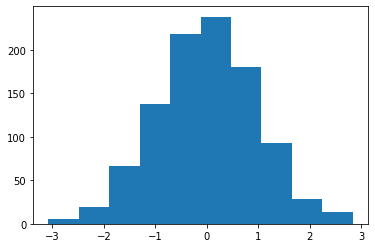

In [1]:
from numpy.random import randn
from matplotlib import pyplot as plt
samples = randn(1000)
plt.hist(samples)
plt.show()

One question that might come up in your mind is: How does numpy gather samples that match this distribution, or any other distribution? (in other words, how does numpy.randn work?)  That question will be important for our work this week.  Below you will find a simple algorithm that will gather samples from a Boltzmann distribution. (given below).  This distribution is an important one in physics because it gives probabilities for excited states in classical systems.

$$ P(x) = A e^{-x\over kT}$$

1. <span style="color:red"> Study the code and add comments next to each line.  </span>
2. <span style="color:red"> How could you make this distribution more (or less) sharply peaked.  Investigate and try to draw a physical conclusion. (i.e. which distribution describes a hot system and which describes a cold system.)  </span>
        

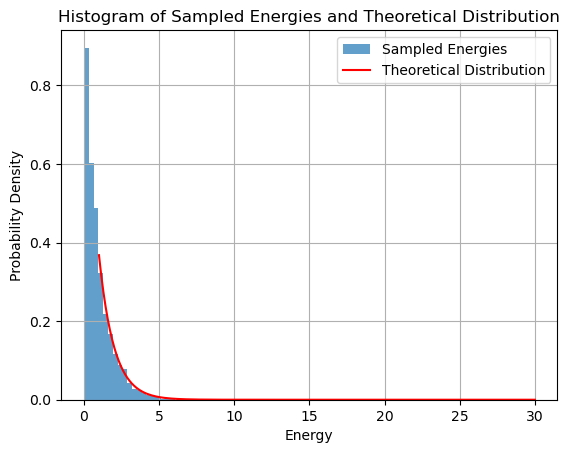

In [9]:
from numpy.random import random
from numpy import exp, linspace, array
from matplotlib import pyplot as plt

# Set parameters
kT = 1 # Boltzmann constant times temperature
l = 30  # Upper limit for energy
num_points = 200  # Number of points for plotting

# Generate x values for plotting
x = linspace(1, l, num_points)

# Compute theoretical probability distribution
y = 1 / (kT * (1 - exp(-l / kT))) * exp(-x / kT)

# List to store sampled energies
samples = []

# Generate samples using the Metropolis algorithm
for i in range(100000):
    randE = random() * 30  # Generate a random energy value
    myRand = random()  # Generate a random number to compare with acceptance probability
    if myRand <= exp(-randE / kT):  # Accept the energy with a probability according to Boltzmann distribution
        samples.append(randE)  # Add the accepted energy to the samples list

# Plot histogram of sampled energies and theoretical probability distribution
plt.hist(samples, density=True, bins=30, alpha=0.7, label='Sampled Energies')
plt.plot(x, y, 'r-', label='Theoretical Distribution')
plt.xlabel('Energy')
plt.ylabel('Probability Density')
plt.title('Histogram of Sampled Energies and Theoretical Distribution')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

To sharpen the peak, simply decrease the value of kT, and to smoothen the peak and eliminate the quickly increasing slope, increase the value of kT.